<a href="https://colab.research.google.com/github/ardran/PickSmart-choose-smartly-spend-wisely./blob/main/EDA_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install requests beautifulsoup4 lxml


In [3]:
import requests
from bs4 import BeautifulSoup

In [9]:
def extract_multiple_products(url):
    headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/123.0.0.0 Safari/537.36",
    "Accept-Language": "en-US,en;q=0.9",
    }
    response = requests.get(url, headers=headers)

    print("Status Code:", response.status_code)

    if response.status_code != 200:
        return []

    soup = BeautifulSoup(response.content, "lxml")
    product_blocks = soup.select("div.s-main-slot div.s-result-item[data-component-type='s-search-result']")

    products = []
    for block in product_blocks:
        title_elem = block.select_one("h2[aria-label]")
        price_elem = block.select_one("span.a-price > span.a-offscreen")
        rating_elem = block.select_one("i.a-icon-star-small span")


        title = title_elem["aria-label"] if title_elem else "Not found"
        price = price_elem.get_text(strip=True) if price_elem else "Not found"
        rating = rating_elem.get_text(strip=True) if rating_elem else "Not found"

        products.append({
            "Title": title,
            "Price": price,
            "Rating": rating,

        })

    return products


import csv

url = input("Enter Amazon search/category page URL: ")
product_list = extract_multiple_products(url)

if product_list:
    keys = product_list[0].keys()
    with open("amazon_multiple_products.csv", "w", newline="", encoding="utf-8") as f:
        writer = csv.DictWriter(f, fieldnames=keys)
        writer.writeheader()
        writer.writerows(product_list)
    print(f"\n✅ {len(product_list)} products saved to 'amazon_multiple_products.csv'")
else:
    print("\n❌ No products found.")



Enter Amazon search/category page URL: https://www.amazon.in/s?k=women%27s+earrings+on+amazon&ref=nb_sb_noss
Status Code: 200

✅ 48 products saved to 'amazon_multiple_products.csv'


In [11]:
import pandas as pd
df = pd.read_csv('amazon_multiple_products.csv')
df.drop(df[df['Rating'] == 'Not found'].index, inplace=True)

print(df)

                                                Title      Price  \
0   Combo of 3 Cubic Zirconia & Pearls Contemporar...       ₹369   
1   Set of 2 Gold Tone Contemporary Cubic Zirconia...       ₹329   
2   Latest Stylish Crystal Pearl Earrings for Wome...       ₹259   
3   Glittering Cubic Zirconia Studded Rose Gold Ba...       ₹328   
4   Amazon Brand - Nora Nico Women's 925 Sterling ...     ₹2,599   
5   Gold Tone Set of 4 Contemporary Cubic Zirconia...       ₹249   
7   18k Rose Gold Plated Latest Stylish Copper Zir...       ₹500   
8   Women's Base Metal Cubic Zirconia Diamonds & P...       ₹369   
9   Gold Plated Drop Fashion Earrings for Women & ...       ₹659   
10  Sparkling Cubic Zirconia & Pearl Stud Earring ...       ₹272   
11  Gold Tone Cubic Zirconia & Pearl Contemporary ...       ₹251   
12  Gold Tone Artificial Stones & Austrian Diamond...       ₹399   
13  C-Shaped Chunky Triple Hoop Western Golden Ear...       ₹289   
14  18K Gold Plated Water Drop Dark Red Rose Col

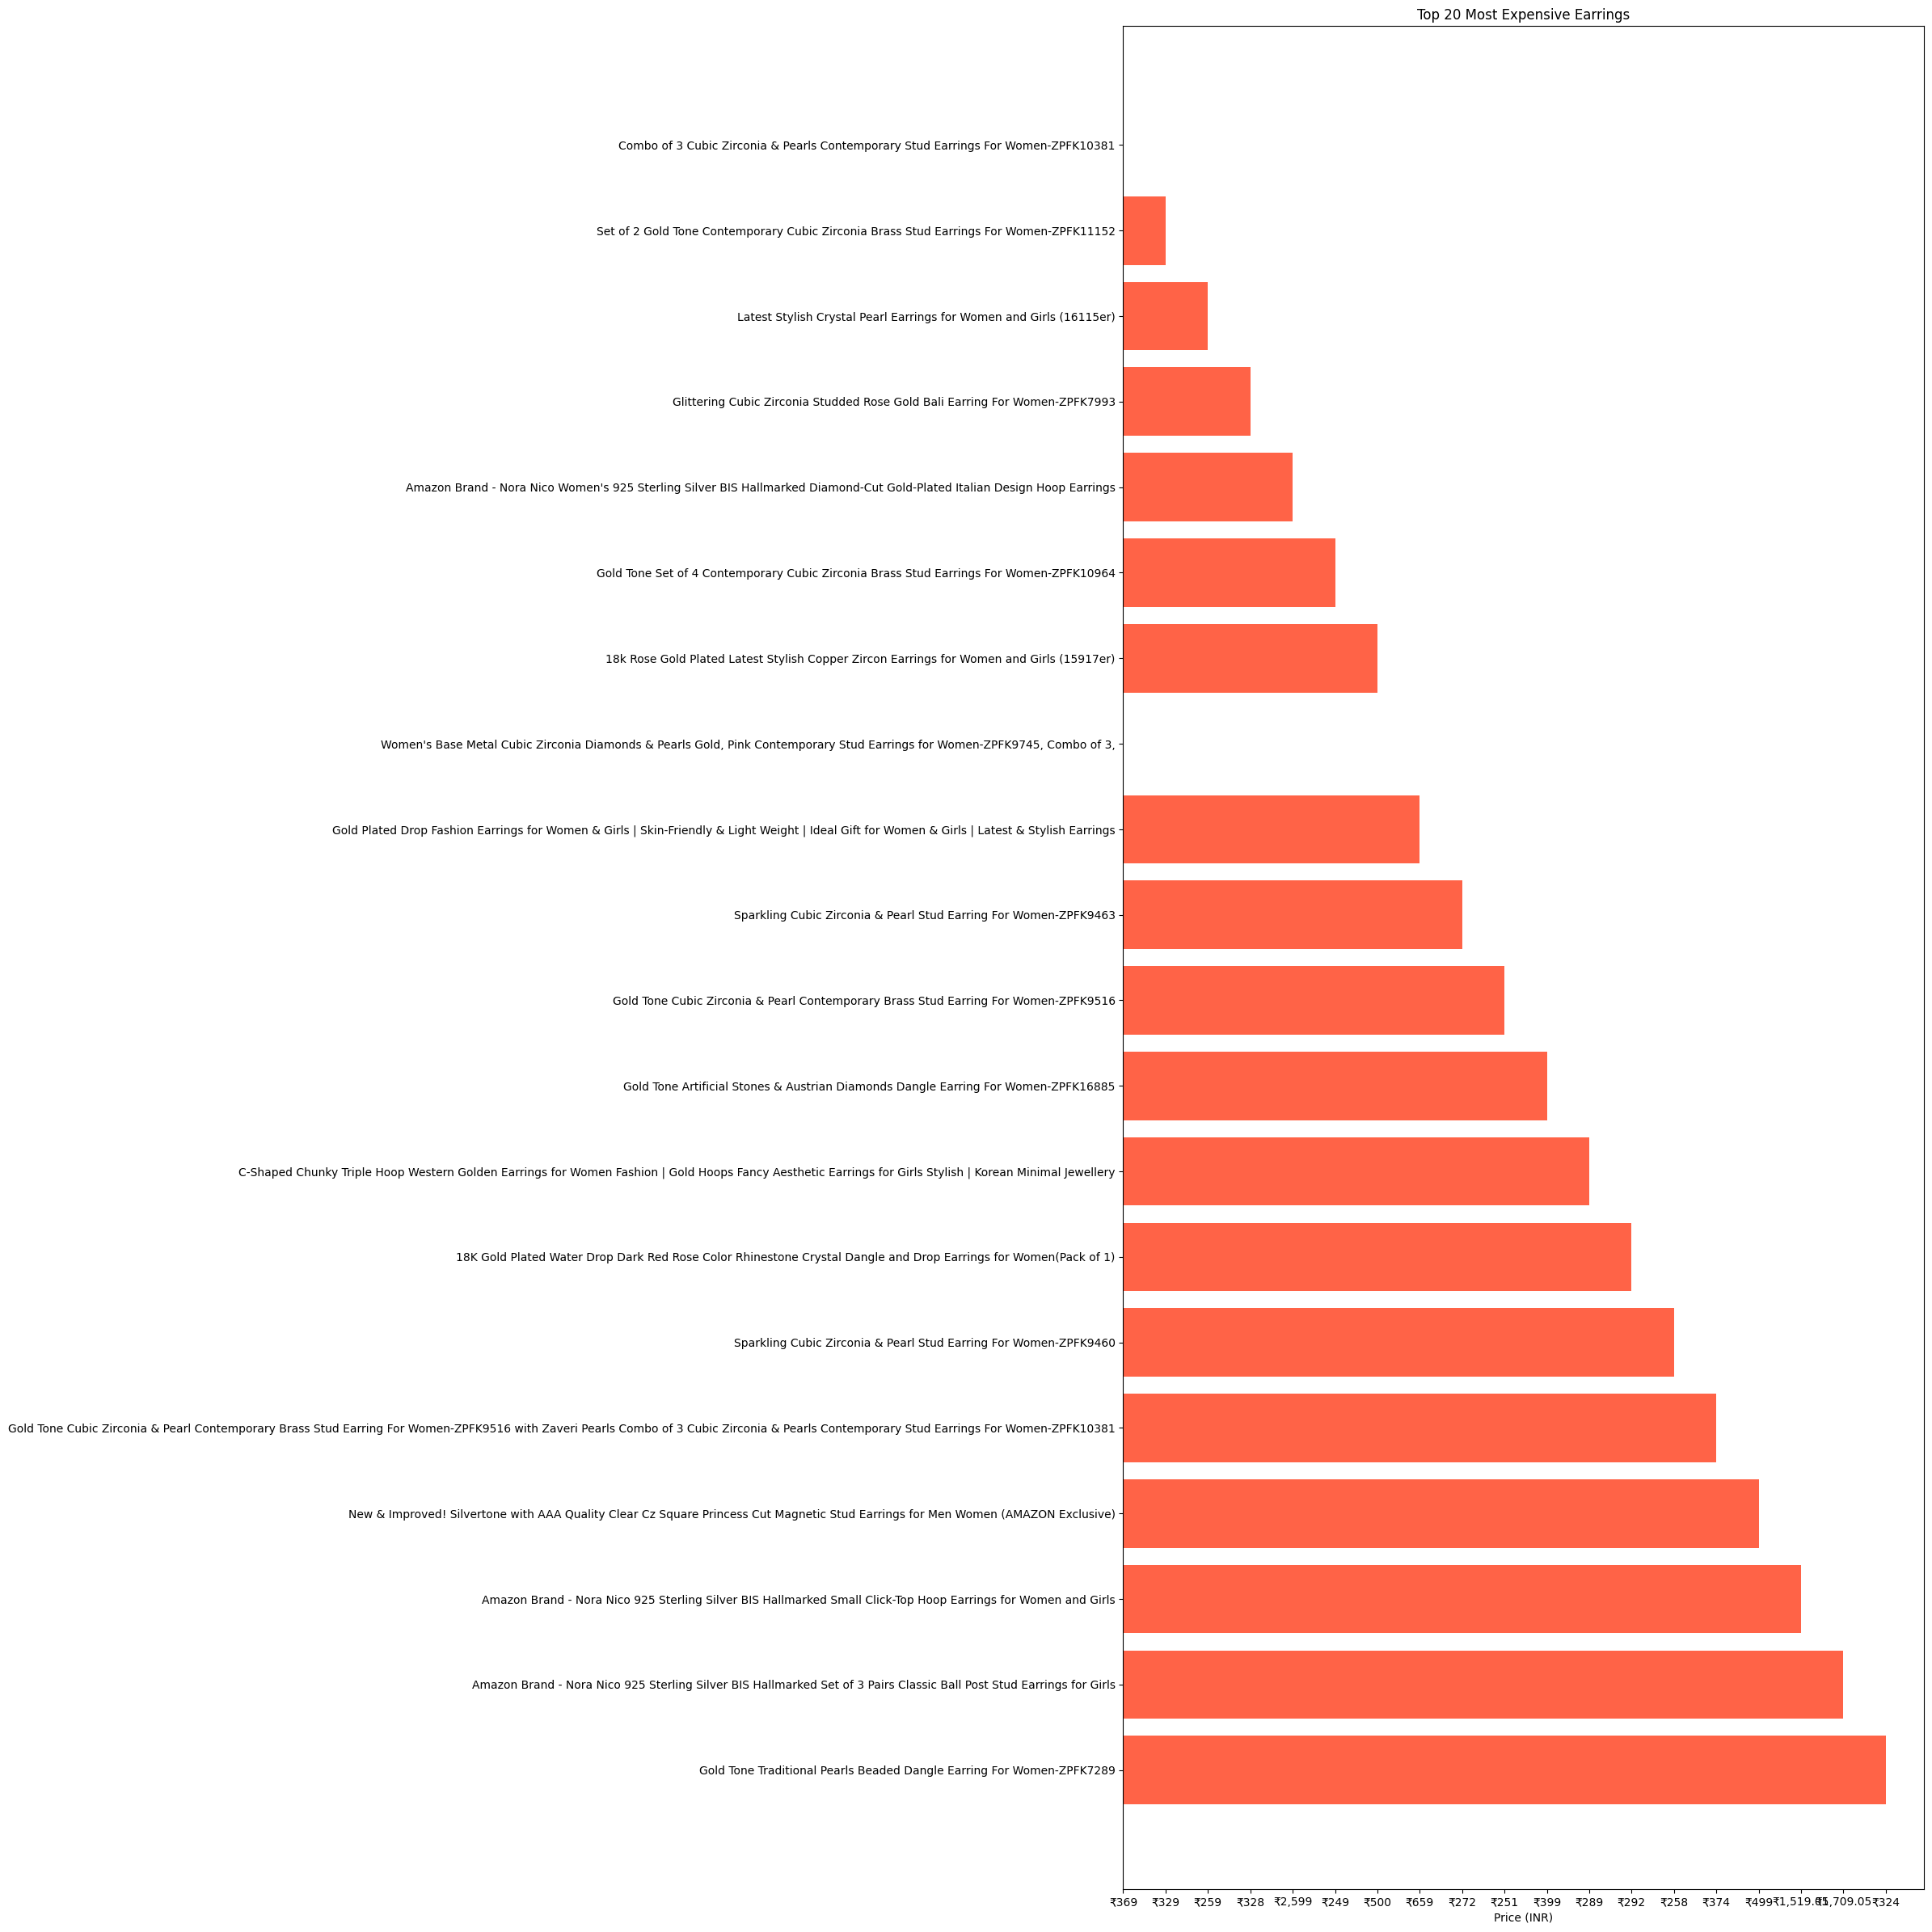

In [12]:
import matplotlib.pyplot as plt

top=df.head(20)#most expensive
plt.figure(figsize=(24, 24))
plt.barh(top["Title"], top["Price"], color="tomato")
plt.xlabel("Price (INR)")
plt.title("Top 20 Most Expensive Earrings")
plt.gca().invert_yaxis() #inverts the y-axis, so that the highest value appears at the top
plt.tight_layout() #adjusts the spacing of plot elements (title, labels, axis ticks) to prevent overlap or clipping.
plt.show()

In [14]:

sorted_df = df.sort_values(by="Rating", ascending=False)
print(sorted_df[['Title', 'Price', 'Rating']])
sorted_df.drop


                                                Title      Price  \
9   Gold Plated Drop Fashion Earrings for Women & ...       ₹659   
18  Amazon Brand - Nora Nico 925 Sterling Silver B...  ₹1,519.05   
35  Amazon Brand - Nora Nico 925 Sterling Silver B...     ₹1,699   
38  Amazon Brand - Nora Nico 925 Sterling Silver B...       ₹899   
39  Amazon Brand - Nora Nico 925 Sterling Silver B...     ₹1,499   
27  Amazon Brand - Nora Nico 925 Sterling Silver S...     ₹1,999   
2   Latest Stylish Crystal Pearl Earrings for Wome...       ₹259   
19  Amazon Brand - Nora Nico 925 Sterling Silver B...  ₹1,709.05   
7   18k Rose Gold Plated Latest Stylish Copper Zir...       ₹500   
12  Gold Tone Artificial Stones & Austrian Diamond...       ₹399   
41  Amazon Brand - Nora Nico 925 Sterling Silver B...  ₹1,709.05   
40  Amazon Brand - Nora Nico 925 Sterling Silver B...     ₹2,199   
43  Combo of 2 RoseGold Cubic Zirconia Brass Stud ...       ₹339   
45  Amazon Brand - Nora Nico 925 Sterling Silver

<bound method DataFrame.drop of                                                 Title      Price  \
9   Gold Plated Drop Fashion Earrings for Women & ...       ₹659   
18  Amazon Brand - Nora Nico 925 Sterling Silver B...  ₹1,519.05   
35  Amazon Brand - Nora Nico 925 Sterling Silver B...     ₹1,699   
38  Amazon Brand - Nora Nico 925 Sterling Silver B...       ₹899   
39  Amazon Brand - Nora Nico 925 Sterling Silver B...     ₹1,499   
27  Amazon Brand - Nora Nico 925 Sterling Silver S...     ₹1,999   
2   Latest Stylish Crystal Pearl Earrings for Wome...       ₹259   
19  Amazon Brand - Nora Nico 925 Sterling Silver B...  ₹1,709.05   
7   18k Rose Gold Plated Latest Stylish Copper Zir...       ₹500   
12  Gold Tone Artificial Stones & Austrian Diamond...       ₹399   
41  Amazon Brand - Nora Nico 925 Sterling Silver B...  ₹1,709.05   
40  Amazon Brand - Nora Nico 925 Sterling Silver B...     ₹2,199   
43  Combo of 2 RoseGold Cubic Zirconia Brass Stud ...       ₹339   
45  Amazon Brand - Nora Nico 925 Sterling Silver B...     ₹1,999   
46  Gift 3 Pairs a Set Stainless Steel Hoop Earrin...       ₹630   
1   Set of 2 Gold Tone Contemporary Cubic Zirconia...       ₹329   
23  Amazon Brand - Nora Nico 925 Sterling Silver B...  ₹2,089.05   
0   Combo of 3 Cubic Zirconia & Pearls Contemporar...       ₹369   
8   Women's Base Metal Cubic Zirconia Diamonds & P...       ₹369   
14  18K Gold Plated Water Drop Dark Red Rose Color...       ₹292   
10  Sparkling Cubic Zirconia & Pearl Stud Earring ...       ₹272   
28  Gold Tone Kundan & Pearls Dangle Earring For W...       ₹286   
4   Amazon Brand - Nora Nico Women's 925 Sterling ...     ₹2,599   
5   Gold Tone Set of 4 Contemporary Cubic Zirconia...       ₹249   
22  Gold Tone Traditional Pearls Beaded Dangle Ear...       ₹324   
17  New & Improved! Silvertone with AAA Quality Cl...       ₹499   
16  Gold Tone Cubic Zirconia & Pearl Contemporary ...       ₹374   
3   Glittering Cubic Zirconia Studded Rose Gold Ba...       ₹328   
13  C-Shaped Chunky Triple Hoop Western Golden Ear...       ₹289   
36  Gold Tone Sparrow Design Stud Earring For Wome...       ₹272   
34  Classic Pearl Earrings Set for Women & Girls |...       ₹574   
47  Gift Valentine Gift Italian jewellery Metal, C...       ₹420   
15  Sparkling Cubic Zirconia & Pearl Stud Earring ...       ₹258   
11  Gold Tone Cubic Zirconia & Pearl Contemporary ...       ₹251   
31          Crystal Dangle Drop Earring Set for Women       ₹468   
42  Amazon Brand - Nora Nico 925 Sterling Silver B...     ₹1,699   
32                      Women's Crystal Stud Earrings       ₹462   

                Rating  
9   5.0 out of 5 stars  
18  5.0 out of 5 stars  
35  5.0 out of 5 stars  
38  5.0 out of 5 stars  
39  5.0 out of 5 stars  
27  4.8 out of 5 stars  
2   4.7 out of 5 stars  
19  4.6 out of 5 stars  
7   4.4 out of 5 stars  
12  4.3 out of 5 stars  
41  4.2 out of 5 stars  
40  4.2 out of 5 stars  
43  4.2 out of 5 stars  
45  4.2 out of 5 stars  
46  4.1 out of 5 stars  
1   4.1 out of 5 stars  
23  4.0 out of 5 stars  
0   4.0 out of 5 stars  
8   4.0 out of 5 stars  
14  4.0 out of 5 stars  
10  3.9 out of 5 stars  
28  3.9 out of 5 stars  
4   3.9 out of 5 stars  
5   3.9 out of 5 stars  
22  3.9 out of 5 stars  
17  3.8 out of 5 stars  
16  3.8 out of 5 stars  
3   3.8 out of 5 stars  
13  3.8 out of 5 stars  
36  3.7 out of 5 stars  
34  3.7 out of 5 stars  
47  3.7 out of 5 stars  
15  3.6 out of 5 stars  
11  3.3 out of 5 stars  
31  2.9 out of 5 stars  
42  2.7 out of 5 stars  
32  2.4 out of 5 stars  >

<ipython-input-17-1798cb72d72d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Rating', y='Price_clean', data=df, palette='Set2', order=['< 3.0', '3.0 - 3.9', '4.0 - 4.4', '4.5 - 5.0'])


UnboundLocalError: cannot access local variable 'boxprops' where it is not associated with a value

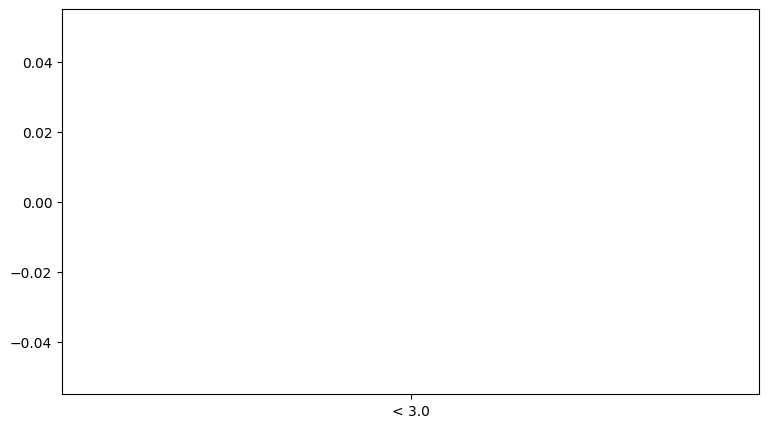

In [17]:
import seaborn as sns
df['Price_clean'] = df['Price'].str.replace('₹', '').str.replace(',', '').astype(float)

plt.figure(figsize=(9, 5))
sns.boxplot(x='Rating', y='Price_clean', data=df, palette='Set2', order=['< 3.0', '3.0 - 3.9', '4.0 - 4.4', '4.5 - 5.0'])
plt.title("Price Range by Rating Group")
plt.xlabel("Rating")
plt.ylabel("Price")
plt.tight_layout()
plt.show()



Unique values in 'Rating_Category' column:
['4.0 - 4.4' '4.5 - 5.0' '3.0 - 3.9' '< 3.0']


<ipython-input-18-0eabc1a8eed2>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Rating_Category', y='Price_clean', data=df_filtered, palette='Set2', order=rating_order)


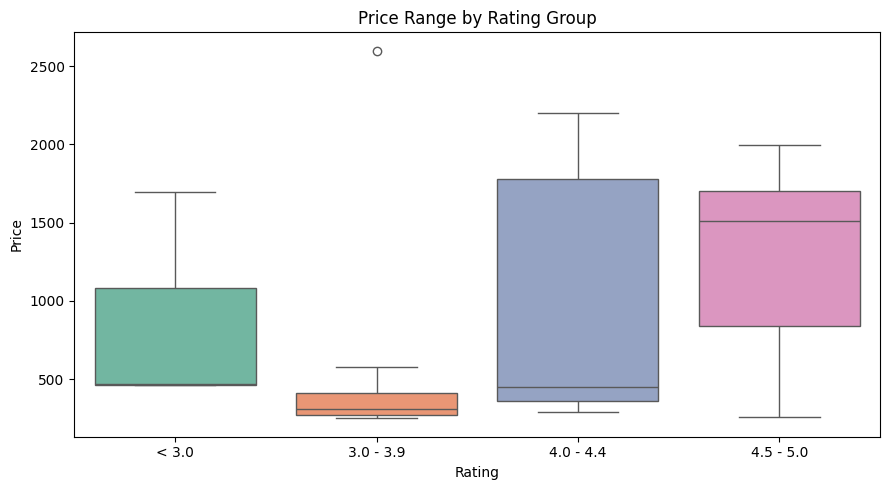

In [18]:
def categorize_rating(rating_str):
    try:
        # Extract the numerical part of the rating
        rating_value = float(rating_str.split(' ')[0])
        if rating_value < 3.0:
            return '< 3.0'
        elif 3.0 <= rating_value <= 3.9:
            return '3.0 - 3.9'
        elif 4.0 <= rating_value <= 4.4:
            return '4.0 - 4.4'
        elif 4.5 <= rating_value <= 5.0:
            return '4.5 - 5.0'
        else:
            return 'Other' # Handle cases outside the expected range
    except:
        return 'Unknown' # Handle cases that can't be parsed


df['Rating_Category'] = df['Rating'].apply(categorize_rating)

# Check the unique values in the new 'Rating_Category' column
print("\nUnique values in 'Rating_Category' column:")
print(df['Rating_Category'].unique())

# Define the order for the boxplot using the new categorical column
rating_order = ['< 3.0', '3.0 - 3.9', '4.0 - 4.4', '4.5 - 5.0']

# Filter out any rows that resulted in 'Other' or 'Unknown' if you don't want to include them
df_filtered = df[df['Rating_Category'].isin(rating_order)].copy()

plt.figure(figsize=(9, 5))
# Use the new 'Rating_Category' column for the x-axis
sns.boxplot(x='Rating_Category', y='Price_clean', data=df_filtered, palette='Set2', order=rating_order)
plt.title("Price Range by Rating Group")
plt.xlabel("Rating")
plt.ylabel("Price")
plt.tight_layout()
plt.show()

In [19]:
# Clean data
df['Price_clean'] = df['Price'].str.replace('₹', '').str.replace(',', '').astype(float)
df['Rating_clean'] = df['Rating'].str.extract(r'([0-9.]+)').astype(float)

# Calculate value score
df['Value_Score'] = df['Rating_clean'] / df['Price_clean']


In [20]:
best_value = df.sort_values(by='Value_Score', ascending=False)


In [21]:
top_10 = best_value[['Title', 'Price', 'Rating', 'Value_Score']].head(10)
print(top_10)


                                                Title Price  \
2   Latest Stylish Crystal Pearl Earrings for Wome...  ₹259   
5   Gold Tone Set of 4 Contemporary Cubic Zirconia...  ₹249   
10  Sparkling Cubic Zirconia & Pearl Stud Earring ...  ₹272   
15  Sparkling Cubic Zirconia & Pearl Stud Earring ...  ₹258   
14  18K Gold Plated Water Drop Dark Red Rose Color...  ₹292   
28  Gold Tone Kundan & Pearls Dangle Earring For W...  ₹286   
36  Gold Tone Sparrow Design Stud Earring For Wome...  ₹272   
13  C-Shaped Chunky Triple Hoop Western Golden Ear...  ₹289   
11  Gold Tone Cubic Zirconia & Pearl Contemporary ...  ₹251   
1   Set of 2 Gold Tone Contemporary Cubic Zirconia...  ₹329   

                Rating  Value_Score  
2   4.7 out of 5 stars     0.018147  
5   3.9 out of 5 stars     0.015663  
10  3.9 out of 5 stars     0.014338  
15  3.6 out of 5 stars     0.013953  
14  4.0 out of 5 stars     0.013699  
28  3.9 out of 5 stars     0.013636  
36  3.7 out of 5 stars     0.013603  
13